In [1]:
# Cargar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mt

In [2]:
# Asignar el directorio de trabajo, donde se encuentran los datos
import os
os.chdir("C:\\Users\\oskka\\OneDrive\\Documentos\\José\\CONAPO")

In [4]:
# Nacimientos 2022, desde Estadísticas Vitales de INEGI
#Descarga de datos y crear repositorio en directorio de trabajo
#Fuente: https://www.inegi.org.mx/contenidos/programas/natalidad/datosabiertos/2022/conjunto_de_datos_natalidad_2022_csv.zip
nacimientos = pd.read_csv('NACIMIENTOS_2022\\conjunto_de_datos\\conjunto_de_datos_natalidad_2022.csv')

In [69]:
# Selección de nacimientos femeninos por edad de la madre
nacim = nacimientos[(nacimientos['sexo']==2) & (nacimientos['edad_madn']<99)]
nacim = nacim[['edad_madn']]
# Agrupar por intervalos de edad de la madre
nacim['Grupos_Edad'] = pd.cut(x = nacim['edad_madn'], bins=[15, 20, 25, 30, 35, 40, 45, 50], right=False)
nacim2= nacim.groupby(['Grupos_Edad'], as_index=False).count()
print(nacim2)

  Grupos_Edad  edad_madn
0    [15, 20)     126646
1    [20, 25)     237784
2    [25, 30)     227793
3    [30, 35)     165932
4    [35, 40)      83992
5    [40, 45)      21909
6    [45, 50)       1976


C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\892633022.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nacim2= nacim.groupby(['Grupos_Edad'], as_index=False).count()


In [83]:
#Poblaciones estables: método de Lotka, con base en población femenina y nacimiento de mujeres
# Preston, Heuveline & Guillot (2000, Cap. 7)
df = pd.read_csv('bin\\tabla_de_mortalidad_2022.csv')
#Seleccionamos población femenina y columnas de Tabla de Vida
femen = df.iloc[23:42, 2:15]
femen = femen.reset_index()
femen = femen[['Grupos_Edad', 'x', 'n', 'POBLACION', 'lx', 'apvLx', 'Tx', 'evx']]
femen['apvLx'] = femen['apvLx']/1000000
femen['Tx'] = femen['Tx']/1000000


print(femen)

   Grupos_Edad   x  n  POBLACION       lx     apvLx         Tx   evx
0       [0, 1)   0  1    1025333  1000000  0.990123  78.395713  78.4
1       [1, 5)   1  4    4116357   989225  3.950355  77.405590  78.2
2      [5, 10)   5  5    5346845   986585  4.930376  73.455234  74.5
3     [10, 15)  10  5    5584258   985565  4.924305  68.524859  69.5
4     [15, 20)  15  5    5577227   984157  4.914271  63.600554  64.6
5     [20, 25)  20  5    5583731   981551  4.898172  58.686283  59.8
6     [25, 30)  25  5    5473009   977718  4.876659  53.788112  55.0
7     [30, 35)  30  5    5197783   972946  4.850406  48.911453  50.3
8     [35, 40)  35  5    4784339   967216  4.818674  44.061047  45.6
9     [40, 45)  40  5    4405008   960253  4.778730  39.242373  40.9
10    [45, 50)  45  5    4200185   951239  4.724790  34.463643  36.2
11    [50, 55)  50  5    3701984   938677  4.646654  29.738853  31.7
12    [55, 60)  55  5    3129061   919985  4.529395  25.092199  27.3
13    [60, 65)  60  5    2509383  

In [84]:
def simplifica(tabla):
    for i in reversed(range(len(tabla))):
        if tabla['x'].iloc[i] == 0: 
            tabla['n'].iloc[i] = 5
            tabla['POBLACION'].iloc[i] = tabla['POBLACION'].iloc[i] + tabla['POBLACION'].iloc[i + 1] 
            tabla['apvLx'].iloc[i] = tabla['apvLx'].iloc[i] + tabla['apvLx'].iloc[i + 1]
            tabla = tabla.drop(1).reset_index(drop=True)
    return(tabla)


In [85]:
tabla_mortalidad = simplifica(femen)
print(tabla_mortalidad)

   Grupos_Edad   x  n  POBLACION       lx     apvLx         Tx   evx
0       [0, 1)   0  5    5141690  1000000  4.940478  78.395713  78.4
1      [5, 10)   5  5    5346845   986585  4.930376  73.455234  74.5
2     [10, 15)  10  5    5584258   985565  4.924305  68.524859  69.5
3     [15, 20)  15  5    5577227   984157  4.914271  63.600554  64.6
4     [20, 25)  20  5    5583731   981551  4.898172  58.686283  59.8
5     [25, 30)  25  5    5473009   977718  4.876659  53.788112  55.0
6     [30, 35)  30  5    5197783   972946  4.850406  48.911453  50.3
7     [35, 40)  35  5    4784339   967216  4.818674  44.061047  45.6
8     [40, 45)  40  5    4405008   960253  4.778730  39.242373  40.9
9     [45, 50)  45  5    4200185   951239  4.724790  34.463643  36.2
10    [50, 55)  50  5    3701984   938677  4.646654  29.738853  31.7
11    [55, 60)  55  5    3129061   919985  4.529395  25.092199  27.3
12    [60, 65)  60  5    2509383   891773  4.351304  20.562804  23.1
13    [65, 70)  65  5    1890318  

C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\1984292036.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tabla['n'].iloc[i] = 5
C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\1984292036.py:4: SettingWithCopyWarning: 
A value is tr

In [70]:
# Población femenina en edad fértil
femenf = (tabla_mortalidad[tabla_mortalidad['x'].between(15, 45)].reset_index(drop=True))
print(femenf)
print(nacim2)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx
0    [15, 20)  15  5    5577227  984157  4.914271  63.600554  64.6
1    [20, 25)  20  5    5583731  981551  4.898172  58.686283  59.8
2    [25, 30)  25  5    5473009  977718  4.876659  53.788112  55.0
3    [30, 35)  30  5    5197783  972946  4.850406  48.911453  50.3
4    [35, 40)  35  5    4784339  967216  4.818674  44.061047  45.6
5    [40, 45)  40  5    4405008  960253  4.778730  39.242373  40.9
6    [45, 50)  45  5    4200185  951239  4.724790  34.463643  36.2
  Grupos_Edad  edad_madn
0    [15, 20)     126646
1    [20, 25)     237784
2    [25, 30)     227793
3    [30, 35)     165932
4    [35, 40)      83992
5    [40, 45)      21909
6    [45, 50)       1976


In [49]:
type(femenf['Grupos_Edad'])

pandas.core.series.Series

In [77]:
# Se fusionan las tablas de mortalidad y de nacimientos femeninos
estable = pd.concat([femenf, nacim2], axis=1)

# Tasa Específica de Fecundidad Femenina
estable['5ma'] = (estable['edad_madn'] / estable['POBLACION'])
# TEFF por APV en cada grupo de edad (considerando la mortalidad)
estable['tnr'] = (estable['5ma'] * estable['apvLx'])
# La suma corresponde a la Tasa Neta de Reproducción
print(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5577227  984157  4.914271  63.600554  64.6   
1    [20, 25)  20  5    5583731  981551  4.898172  58.686283  59.8   
2    [25, 30)  25  5    5473009  977718  4.876659  53.788112  55.0   
3    [30, 35)  30  5    5197783  972946  4.850406  48.911453  50.3   
4    [35, 40)  35  5    4784339  967216  4.818674  44.061047  45.6   
5    [40, 45)  40  5    4405008  960253  4.778730  39.242373  40.9   
6    [45, 50)  45  5    4200185  951239  4.724790  34.463643  36.2   

  Grupos_Edad  edad_madn       5ma       tnr  
0    [15, 20)     126646  0.022708  0.111592  
1    [20, 25)     237784  0.042585  0.208589  
2    [25, 30)     227793  0.041621  0.202972  
3    [30, 35)     165932  0.031924  0.154842  
4    [35, 40)      83992  0.017556  0.084595  
5    [40, 45)      21909  0.004974  0.023768  
6    [45, 50)       1976  0.000470  0.002223  


In [78]:
# TASA NETA DE REPRODUCCIÓN FEMENINA
tnr = round(estable['tnr'].sum(), 3)
r0 = round(mt.log(tnr) / 27, 5)
print(r0)

-0.00878


In [79]:
estable['r0']=0
estable['r1']=0
estable['r2']=0
estable['r3']=0
print(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5577227  984157  4.914271  63.600554  64.6   
1    [20, 25)  20  5    5583731  981551  4.898172  58.686283  59.8   
2    [25, 30)  25  5    5473009  977718  4.876659  53.788112  55.0   
3    [30, 35)  30  5    5197783  972946  4.850406  48.911453  50.3   
4    [35, 40)  35  5    4784339  967216  4.818674  44.061047  45.6   
5    [40, 45)  40  5    4405008  960253  4.778730  39.242373  40.9   
6    [45, 50)  45  5    4200185  951239  4.724790  34.463643  36.2   

  Grupos_Edad  edad_madn       5ma       tnr  r0  r1  r2  r3  
0    [15, 20)     126646  0.022708  0.111592   0   0   0   0  
1    [20, 25)     237784  0.042585  0.208589   0   0   0   0  
2    [25, 30)     227793  0.041621  0.202972   0   0   0   0  
3    [30, 35)     165932  0.031924  0.154842   0   0   0   0  
4    [35, 40)      83992  0.017556  0.084595   0   0   0   0  
5    [40, 45)      21909  0.004974  0.023768   0   0   0   0 

In [80]:
# Identificación de la Tasa de Crecimiento Intrínseca a través de iteraciones
# Fuente: Preston, Heuveline & Guillot (2001, p: 149)
def busca_r(tabla):
    # Tasa de crecimiento inicial a partir de TNRF
    r = round(mt.log((tabla['tnr'].sum())) / 27, 5)
    # Iteraciones
    for j in range(12, 16):
        for i in range(len(tabla)):
            tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
        yr = round(tabla.iloc[:,j].sum(), 5)
        r +=  round((yr - 1) / 27, 5 )
        
    print(tabla)
    print(yr)
    print(r)
    return r

In [81]:
r_intrinseca = busca_r(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5577227  984157  4.914271  63.600554  64.6   
1    [20, 25)  20  5    5583731  981551  4.898172  58.686283  59.8   
2    [25, 30)  25  5    5473009  977718  4.876659  53.788112  55.0   
3    [30, 35)  30  5    5197783  972946  4.850406  48.911453  50.3   
4    [35, 40)  35  5    4784339  967216  4.818674  44.061047  45.6   
5    [40, 45)  40  5    4405008  960253  4.778730  39.242373  40.9   
6    [45, 50)  45  5    4200185  951239  4.724790  34.463643  36.2   

  Grupos_Edad  edad_madn       5ma       tnr        r0        r1        r2  \
0    [15, 20)     126646  0.022708  0.111592  0.130171  0.129784  0.129784   
1    [20, 25)     237784  0.042585  0.208589  0.254263  0.253292  0.253292   
2    [25, 30)     227793  0.041621  0.202972  0.258545  0.257339  0.257339   
3    [30, 35)     165932  0.031924  0.154842  0.206110  0.204974  0.204974   
4    [35, 40)      83992  0.017556  0.084595  0.1

C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.13017080514784618' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.129784122478201' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.129784122478201' h

In [108]:
# Obtención de la población estable
# Con base en la tasa de crecimiento intrínseca
# Fuente: Preston, Heuveline & Guillot (2001, p: 150)

# Radix: 1
#femen['lx'] = femen['lx'] / 1000000

# c_actual: Estructura de población femenina actual
def stable(femen):
    femen['c_actual'] = femen['POBLACION'] / femen['POBLACION'].sum()
    # sobrevivencia por cohorte
    femen['b_inv'] = ""
    femen['ca_estable'] = ""
    
    for i in range(len(femen)):
        if femen['x'].iloc[i] == 85:
            femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + femen['evx'].iloc[i])) * (femen['Tx'].iloc[i]))
        else:
            femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i]))
    
    b_intr = round(1 / femen['b_inv'].sum(), 5)
    d_intr = r_intrinseca - b_intr

    # Estructura de Población estable
    for i in range(len(femen)):
        femen['ca_estable'].iloc[i] = b_intr * mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i])
    
    print ("r: " + str(r_intrinseca)) 
    print("b: " + str(b_intr))
    print("d: " + str(d_intr))
    print("suma de ca_estable: " + str(round(femen['ca_estable'].sum(), 5)))
       
    return(femen)

In [110]:
pop_estable = stable(tabla_mortalidad)

r: -0.00863
b: 0.00873
d: -0.01736
suma de ca_estable: 0.97552


C:\Users\oskka\AppData\Local\Temp\ipykernel_12336\533711401.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i]))
C:\Users\oskka\AppDat

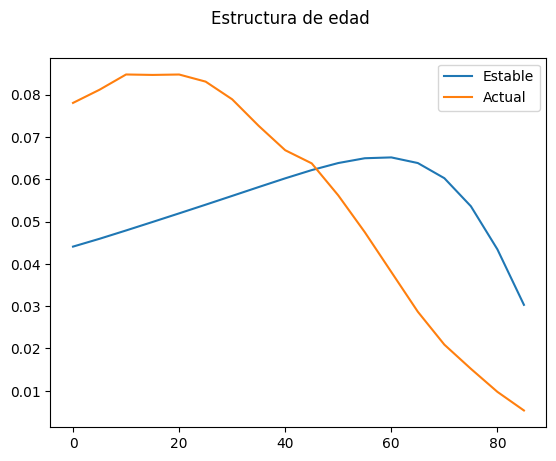

In [111]:

x = pop_estable.x
y1 = pop_estable.ca_estable
y2 = pop_estable.c_actual

fig, axs = plt.subplots()
fig.suptitle('Estructura de edad')
axs.plot(x, y1, label='Estable')
axs.plot(x, y2, label='Actual')

#Legend
axs.legend()

plt.show()